In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve, balanced_accuracy_score, f1_score, RocCurveDisplay
from imblearn.over_sampling import SMOTE
import lightgbm



KeyboardInterrupt



In [ ]:
features = pd.read_csv('/Users/seibi/projects/ms_driams/cipro_x.csv')
outcome = pd.read_csv('/Users/seibi/projects/ms_driams/cipro_y.csv')

In [ ]:
# No SMOTE, No Feature Selection
print("No SMOTE, No Feature Selection...")
regular_roc = []
regular_acc = []
regular_fs_f1 = []
for i in np.arange(1,10,1):
    skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = i)
    fold_count = 1
    for train_index, test_index in skf.split(features, outcome):
        print(f"Evaluating Fold {fold_count}/5...")
        X_train, X_test = features.iloc[train_index], features.iloc[test_index]
        y_train, y_test = outcome.iloc[train_index], outcome.iloc[test_index]
        reg_lightgbm = lightgbm.LGBMClassifier(objective="binary", seed=42, boosting_type='gbdt', learning_rate=0.01, n_estimators=25, min_child_samples=1)
        _ = reg_lightgbm.fit(X_train, y_train)#, eval_set = (features_val, outcome_val), callbacks = [lightgbm.early_stopping(50)])
        #y_pred = reg_lightgbm.predict(X_test)
        y_prob = reg_lightgbm.predict_proba(X_test)[:,1]
        regular_roc.append(roc_auc_score(y_test, y_prob))
        #regular_acc.append(accuracy_score(y_test, y_pred))
        #regular_fs_f1.append(f1_score(y_test, y_pred))
        # print("ROC:", roc_auc_score(y_test, y_pred))
        # print("ACC:", accuracy_score(y_test, y_pred))
        # print("F1:", f1_score(y_test, y_pred))
        fold_count += 1

In [ ]:
plt.hist(regular_roc, bins =50)

In [21]:
import numpy as np
import pandas as pd
df = np.array([[0.730875576036866, 0.765345622119815, 0.749308755760368, 0.767281105990783, 0.750138248847926, 0.774101382488479],
                [0.716138908605511, 0.743595923426525, 0.704066499538197, 0.712497219073448, 0.667710779786251, 0.709475278887205],
                [0.551621522019532, 0.659311334817895, 0.598304772434125, 0.686843559977888, 0.620692832135618, 0.768933112216694],
                [0.746887966804979, 0.783858921,       0.630000000000000, 0.677000000000000, 0.722063242237802, 0.760468831974054],
                [0.713062524890481, 0.722974093986459, 0.515000000000000, 0.640000000000000, 0.546629950170469, 0.688749016522423],
                [0.709235209235209, 0.715000000000000, 0.610000000000000, 0.729235642135642, 0.634776334776334, 0.739898989898990],
                [0.765304997550220, 0.726188140000000, 0.754011750000000, 0.745302550000000, 0.708096283470410, 0.750011576396499],
                [0.567330488383120, 0.607746020000000, 0.548545200000000, 0.566171430000000, 0.500000000000000, 0.615594100888218],
                [0.839851169858544, 0.813298080000000, 0.808806740000000, 0.820699900000000, 0.765265466917360, 0.821100298138043]],
              dtype='f')


base = df[:, 0].reshape(-1, 1)
df = (df - base) / base

df

array([[ 0.        ,  0.04716272,  0.02522073,  0.04981089,  0.02635561,
         0.05914252],
       [ 0.        ,  0.03834033, -0.0168576 , -0.00508514, -0.06762392,
        -0.00930493],
       [ 0.        ,  0.19522418,  0.08462914,  0.24513562,  0.12521513,
         0.3939506 ],
       [ 0.        ,  0.04949994, -0.15650003, -0.09357226, -0.03323757,
         0.01818326],
       [ 0.        ,  0.01390004, -0.27776322, -0.10246302, -0.23340528,
        -0.0340973 ],
       [ 0.        ,  0.00812817, -0.13991858,  0.02820004, -0.10498469,
         0.04323501],
       [ 0.        , -0.05111277, -0.01475651, -0.02613654, -0.07475284,
        -0.01998343],
       [ 0.        ,  0.07123806, -0.03311174, -0.00204303, -0.11867947,
         0.08507142],
       [ 0.        , -0.03161636, -0.0369642 , -0.02280317, -0.08880821,
        -0.02232639]], dtype=float32)

In [22]:
data = pd.DataFrame(df,
columns = ['Base','SMOTE','FS','SMOTE\n+FS','CNN','CNN\n+SMOTE'],
index = ['Ecoli-ceftriaxone','Ecoli-ciprofloxacin','Ecoli-cefepime','Kpneu-ceftriaxone',"Kpneu-ciprofloxacin",'Kpneu-cefepime','Saureus-ciprofloxacin','Saureus-fusidic',"Saureus-oxacillin"])

data

,Base,SMOTE,FS,SMOTE\n+FS,CNN,CNN\n+SMOTE
Ecoli-ceftriaxone,0.0,0.047163,0.025221,0.049811,0.026356,0.059143
Ecoli-ciprofloxacin,0.0,0.038340,-0.016858,-0.005085,-0.067624,-0.009305
Ecoli-cefepime,0.0,0.195224,0.084629,0.245136,0.125215,0.393951
Kpneu-ceftriaxone,0.0,0.049500,-0.156500,-0.093572,-0.033238,0.018183
Kpneu-ciprofloxacin,0.0,0.013900,-0.277763,-0.102463,-0.233405,-0.034097
Kpneu-cefepime,0.0,0.008128,-0.139919,0.028200,-0.104985,0.043235
Saureus-ciprofloxacin,0.0,-0.051113,-0.014757,-0.026137,-0.074753,-0.019983
Saureus-fusidic,0.0,0.071238,-0.033112,-0.002043,-0.118679,0.085071
Saureus-oxacillin,0.0,-0.031616,-0.036964,-0.022803,-0.088808,-0.022326


In [ ]:
# normalize by row
t_data = data.T
max_ = t_data.max()
max_
t_data /= max_
t_data
# return
t_t_data = t_data.T
t_t_data['drug'] = ['ceft','cipro','cefe','ceft','cipro','cefe','cipro','fus','oxa']
t_t_data['patho']=['ecoli','ecoli','ecoli','K','K','K',"S",'S','S']
t_t_data

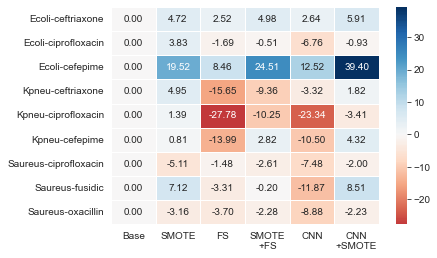

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare a vector of color mapped to the 'cyl' column
#colored_column = t_t_data['patho']
#my_palette = dict(zip(colored_column.unique(), ['red','green','blue','orange','purple']))
#row_colors = colored_column.map(my_palette)
sns.heatmap(data*100, linewidths=1, cmap="RdBu", annot=True, fmt=".2f", center=0) #, row_colors=row_colors,)
plt.savefig("results-heatmap.pdf", dpi=300, bbox_inches='tight')

In [ ]:
values= pd.DataFrame(t_t_data.median(axis=0), columns=["Median"])
values


In [ ]:

sns.barplot(data=values, x= values.index, y= values['Median'])